# **Transfer Learning for Horses and Humans Classifier**

**Transfer Learning**

**Idea**: Instead of learning a set of filters from scratch for our dataset, why not use a set of filters that were learned on a much larger dataset, with many more features than we can **afford** to build from scratch.

$\Rightarrow$  Place **these filters** in the network and then train a model with our data using the **pre-learned filters**

Once they've been trained, **all these layers are just a set of numbers indicating the filter values, weights, and biases along with a known architecture** (number of filters per layer, size of the filter, etc.), the idea of **reusing them** is pretty straightforward.

**The CNN architecture for classification task**

**Architecture**: Convolution layers $\rightarrow$ Dense layer $\rightarrow$ Output layer

<center>

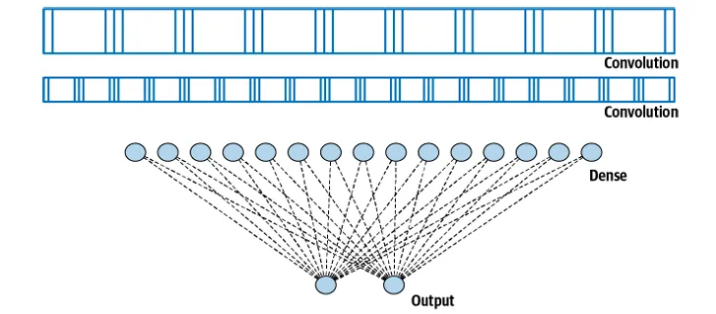
<caption>A convolution neural network (CNN) architecture</caption>

</center>

With **transfer learning**: 
1. Take the pre-learned layers from another model
2. Freeze or lock them so that they aren’t trainable 
3. Put them on top of our model

<center>

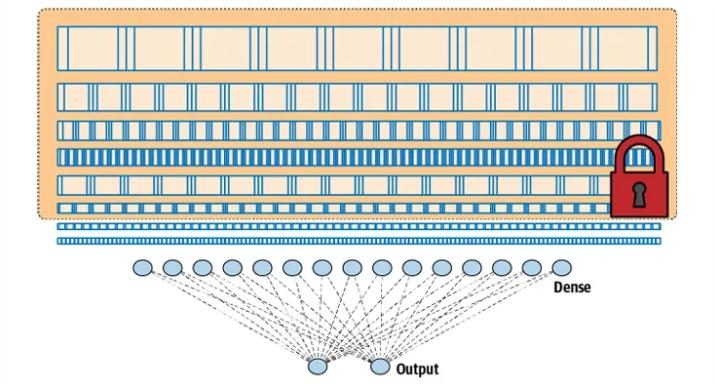
<caption>Taking layers from another architecture via transfer learning</caption>

</center>

There are several pretrained models already available from a variety of sources.

We'll use **version 3** of the popular **Inception** model from **Google** - which is trained on more than a million images from a database called **ImageNet**.

It has dozens of layers and can classify images into one thousand categories. A saved model is available containing the pre-trained weights. 

To use this:
1. **Download the weights** 
2. **Create an instance of the Inception V3** architecture
3. **Load the weights into this architecture**

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import urllib.request
import urllib

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(300, 300, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)

In [13]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 73, 73,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

**Add our layers into the pre-trained model (Inception v3)**

In [41]:
# Freeze or lock them so that they aren’t trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

In [42]:
last_layer = pre_trained_model.get_layer('mixed7').output

print('Last layer output shape: ', last_layer.shape)

Last layer output shape:  (None, 17, 17, 768)


Add **Flatten** layer and **Dense** layers underneath the **mixed7** layer:

In [15]:
# Flatten the output layer to 1 dimension
# Add underneath the mixed7 layer
x = tf.keras.layers.Flatten()(last_layer)

# Add a fully connected layer with 1.024 hidden units and ReLu activation
# Add the Dense underneath the Flatten
x = tf.keras.layers.Dense(1024, activation=tf.nn.relu)(x)

# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)

model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [16]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 73, 73,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 236,256,161 (901.25 MB)

 Trainable params: 227,280,897 (867.01 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

**Load the data**

In [17]:
training_dir = 'data/horse-or-human/train/'
validation_dir = 'data/horse-or-human/validation/'

# Image augmentation & rescaling
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.1)  # 10% for validation
test_datagen = ImageDataGenerator(rescale=1/255)  # No split needed for test set

# Training generator (90% of the data)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary',
    subset="training",  # Training subset
    shuffle=True,
    seed=42
)

# Validation generator (10% of the training data)
validation_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary',
    subset="validation",  # Validation subset
    shuffle=True,
    seed=42
)

# Test generator (from the separate validation directory)
test_generator = test_datagen.flow_from_directory(
    validation_dir,  # This should be your actual test set directory
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Verify dataset sizes
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")

Found 925 images belonging to 2 classes.
Found 102 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Training samples: 925
Validation samples: 102
Test samples: 256


In [23]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=3)

Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - accuracy: 0.7811 - loss: 19.0319 - val_accuracy: 1.0000 - val_loss: 4.7475e-25
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 1.0000 - loss: 1.7911e-09 - val_accuracy: 1.0000 - val_loss: 4.7426e-25
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 1.0000 - loss: 7.3460e-09 - val_accuracy: 1.0000 - val_loss: 4.7340e-25


**Visualize the training result**

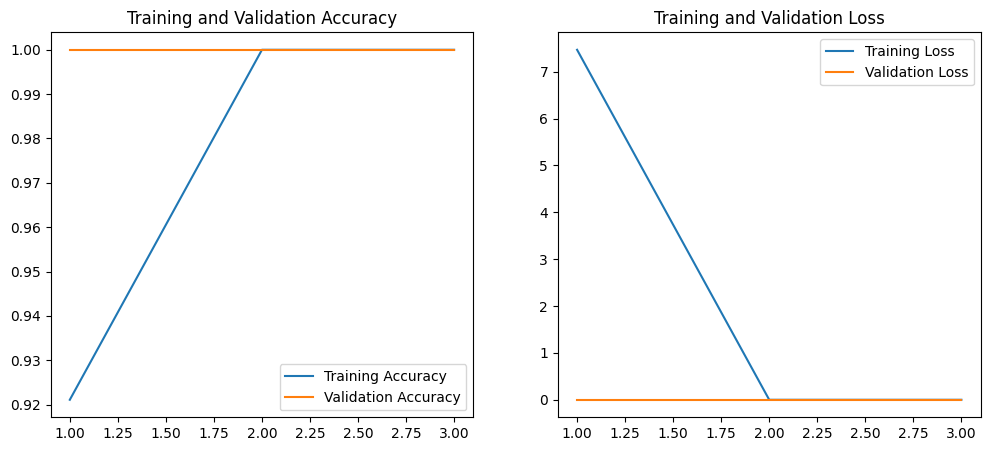

In [38]:
# Extract history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [37]:
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int")  # Convert probabilities to binary labels

# Get class labels
class_labels = list(test_generator.class_indices.keys())

print(class_labels)

# Map predicted classes to labels
predicted_labels = [class_labels[i] for i in predicted_classes.flatten()]

# Get image filenames
filenames = test_generator.filenames  # List of image file names

# Print results
for filename, label in zip(filenames, predicted_labels):
    print(f"{filename}: {label}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
['horses', 'humans']
horses\horse1-000.png: horses
horses\horse1-105.png: horses
horses\horse1-122.png: horses
horses\horse1-127.png: horses
horses\horse1-170.png: horses
horses\horse1-204.png: horses
horses\horse1-224.png: horses
horses\horse1-241.png: horses
horses\horse1-264.png: horses
horses\horse1-276.png: horses
horses\horse1-298.png: horses
horses\horse1-335.png: horses
horses\horse1-384.png: horses
horses\horse1-411.png: horses
horses\horse1-436.png: horses
horses\horse1-455.png: horses
horses\horse1-484.png: horses
horses\horse1-510.png: horses
horses\horse1-539.png: horses
horses\horse1-554.png: humans
horses\horse1-568.png: horses
horses\horse2-011.png: horses
horses\horse2-040.png: horses
horses\horse2-069.png: horses
horses\horse2-112.png: horses
horses\horse2-136.png: horses
horses\horse2-183.png: horses
horses\horse2-201.png: horses
horses\horse2-218.png: horses
horses\horse2-224.png: horses
horses\horse2-254.png: horses
horses\horse

In [40]:
true_classes = test_generator.classes  

# Compute accuracy
accuracy = accuracy_score(true_classes, predicted_classes.reshape(-1, 1))
print(f"Prediction Accuracy: {accuracy:.2%}")  

Prediction Accuracy: 96.48%
